In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from importlib import reload
from datetime import datetime
import tensorflow as tf
import time


# get the relative path
pref                = os.getcwd()

os.environ["RL_PATH"]   = pref

if f'{pref}/RLLibrary' not in sys.path:
    sys.path.append(f'{pref}/RLLibrary')

In [42]:
import pandas as pd
import numpy as np
import os
import shutil

In [43]:
from RLLibrary.utils import constants

In [44]:
from RLLibrary.FinUseCases.OrderExecution import EnvironmentManager
from RLLibrary.FinUseCases.OrderExecution import ExecutionAlgos
from RLLibrary.utils import constants as constants


In [45]:
reload(ExecutionAlgos)
reload(EnvironmentManager)

dict_values([EnvSpec(PortfolioManagement-v0), EnvSpec(PortfolioManagement_CNN-v0), EnvSpec(OrderExecution-v0)])


<module 'RLLibrary.FinUseCases.OrderExecution.EnvironmentManager' from '/Users/ankitgupta/Documents/git/anks/MachineLearning/ReinforcementLearning/RLLibrary/FinUseCases/OrderExecution/EnvironmentManager.py'>

In [46]:
DATA_DIR = constants.DATA_DIR
MODEL_DIR = constants.MODEL_DIR


### Run the different algos and compare the results


#### 1. DQN 3 Layer

In [47]:
usecase = "OrderExecution"
algo = "DQN"
method = "FF"

modelPath = os.path.join(MODEL_DIR, usecase)
modelPath = os.path.join(os.path.join(modelPath, algo), method)

modelName = "DQN_3Layer_80%Expl.h5"





In [48]:
envName = "OrderExecution-v0"
envargs = {"ticker": "RELIANCE", "trainingYear": []}



In [49]:
execAlgo_DQN3 = ExecutionAlgos.Execution_DQN(envName=envName, **envargs)

invHist_DQN3, execPrice_DQN3, rew_DQN3, step_DQN3 = execAlgo_DQN3.run(modelWeights = os.path.join(modelPath, modelName), \
                hiddenUnits = [20, 20, 20], batchNormalization = False, dropoutRate = 0.25, \
                orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}, 
                testDate = "20200131")

Loading Data for 2020
20200131

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Total episodic reward using DQN: 8.459999999999988. Steps taken: 91


#### 2. DQN 1 Layer

In [50]:
usecase = "OrderExecution"
algo = "DQN"
method = "FF"

modelPath = os.path.join(MODEL_DIR, usecase)
modelPath = os.path.join(os.path.join(modelPath, algo), method)

modelName = "DQN_1Layer_80%Exploration.h5"


In [51]:
envName = "OrderExecution-v0"
envargs = {"ticker": "RELIANCE", "trainingYear": []}

execAlgo_DQN1 = ExecutionAlgos.Execution_DQN(envName=envName, **envargs)
invHist_DQN1, execPrice_DQN1, rew_DQN1, step_DQN1 = execAlgo_DQN1.run(modelWeights = os.path.join(modelPath, modelName), \
                hiddenUnits = [20], batchNormalization = False, dropoutRate = 0.25, \
                orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}, 
                testDate = "20200131")


Loading Data for 2020
20200131

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Total episodic reward using DQN: -1.2099999999999995. Steps taken: 59


#### 3. DDQN 3 Layer

In [52]:
usecase = "OrderExecution"
algo = "DDQN"
method = "FF"

modelPath = os.path.join(MODEL_DIR, usecase)
modelPath = os.path.join(os.path.join(modelPath, algo), method)

modelName = "DDQN_3Layer_80%Exploration.h5"


In [53]:
envName = "OrderExecution-v0"
envargs = {"ticker": "RELIANCE", "trainingYear": []}

execAlgo_DDQN3 = ExecutionAlgos.Execution_DDQN(envName=envName, **envargs)
invHist_DDQN3, execPrice_DDQN3, rew_DDQN3, step_DDQN3 = execAlgo_DDQN3.run(modelWeights = os.path.join(modelPath, modelName), \
                hiddenUnits = [20,20,20], batchNormalization = False, dropoutRate = 0.25, \
                orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}, 
                testDate = "20200131")


Loading Data for 2020
20200131

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Total episodic reward using DDQN: 17.66. Steps taken: 9


#### 4. 1 Layer Actor Critic A3C

In [54]:
usecase = "OrderExecution"
algo = "A3C"
method = "FF"

modelPath = os.path.join(MODEL_DIR, usecase)
modelPath = os.path.join(os.path.join(modelPath, algo), method)

modelName = "A3C_1Layer.h5"


In [55]:
envName = "OrderExecution-v0"
envargs = {"ticker": "RELIANCE", "trainingYear": []}

execAlgo_A3C1 = ExecutionAlgos.Execution_A3C(envName=envName, **envargs)
invHist_A3C1, execPrice_A3C1, rew_A3C1, step_A3C1 = execAlgo_A3C1.run(modelWeights = os.path.join(modelPath, modelName), \
                actorHiddenUnits = [20], criticHiddenUnits = [20], \
                orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}, 
                testDate = "20200131")




Loading Data for 2020
20200131
Total episodic reward using A3C: 6.22. Steps taken: 7


#### 5. 3 Layer A3C

In [56]:
usecase = "OrderExecution"
algo = "A3C"
method = "FF"

modelPath = os.path.join(MODEL_DIR, usecase)
modelPath = os.path.join(os.path.join(modelPath, algo), method)

modelName = "A3C_3Layer.h5"


In [57]:
envName = "OrderExecution-v0"
envargs = {"ticker": "RELIANCE", "trainingYear": []}

execAlgo_A3C3 = ExecutionAlgos.Execution_A3C(envName=envName, **envargs)
invHist_A3C3, execPrice_A3C3, rew_A3C3, step_A3C3 = execAlgo_A3C3.run(modelWeights = os.path.join(modelPath, modelName), \
                actorHiddenUnits = [20,20,20], criticHiddenUnits = [20,20,20], \
                orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}, 
                testDate = "20200131")




Loading Data for 2020
20200131
Total episodic reward using A3C: 0.9799999999999991. Steps taken: 5


### 6. Base Execution


In [58]:
envName = "OrderExecution-v0"
envargs = {"ticker": "RELIANCE", "trainingYear": []}

execAlgo_Base = ExecutionAlgos.Execution_EquiBalanced(envName=envName, **envargs)
invHist_Base, execPrice_Base, rew_Base, step_Base = execAlgo_Base.run(inidividualOrderSize = 1, \
                orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}, 
                testDate = "20200131")



Loading Data for 2020
20200131
Total episodic reward using DQN: 0.8100000000000003. Steps taken: 39


#### Compare the results of different models

In [59]:
compare = None
if compare is None:

    compare = invHist_DQN1[["Time", "ExecutedPrice"]]

compare = compare.merge(invHist_DQN1[["Time", "AvailableInventory", "ExecutedPrice"]], how = "outer", left_on = ["Time", "ExecutedPrice"], right_on = ["Time", "ExecutedPrice"] )
compare.rename(columns = {"AvailableInventory": "DQN1_Inv"}, inplace = True)

compare = compare.merge(invHist_DQN3[["Time", "AvailableInventory", "ExecutedPrice"]], how = "outer", left_on = ["Time", "ExecutedPrice"], right_on = ["Time", "ExecutedPrice"] )
compare.rename(columns = {"AvailableInventory": "DQN3_Inv"}, inplace = True)

compare = compare.merge(invHist_DDQN3[["Time", "AvailableInventory", "ExecutedPrice"]], how = "outer", left_on = ["Time", "ExecutedPrice"], right_on = ["Time", "ExecutedPrice"] )
compare.rename(columns = {"AvailableInventory": "DDQN3_Inv"}, inplace = True)

compare = compare.merge(invHist_A3C1[["Time", "AvailableInventory", "ExecutedPrice"]], how = "outer", left_on = ["Time", "ExecutedPrice"], right_on = ["Time", "ExecutedPrice"] )
compare.rename(columns = {"AvailableInventory": "A3C1_Inv"}, inplace = True)

compare = compare.merge(invHist_A3C3[["Time", "AvailableInventory", "ExecutedPrice"]], how = "outer", left_on = ["Time", "ExecutedPrice"], right_on = ["Time", "ExecutedPrice"] )
compare.rename(columns = {"AvailableInventory": "A3C3_Inv"}, inplace = True)

compare = compare.merge(invHist_Base[["Time", "AvailableInventory", "ExecutedPrice"]], how = "outer", left_on = ["Time", "ExecutedPrice"], right_on = ["Time", "ExecutedPrice"] )
compare.rename(columns = {"AvailableInventory": "A3C3_Base"}, inplace = True)


compare = compare.ffill(axis=0)

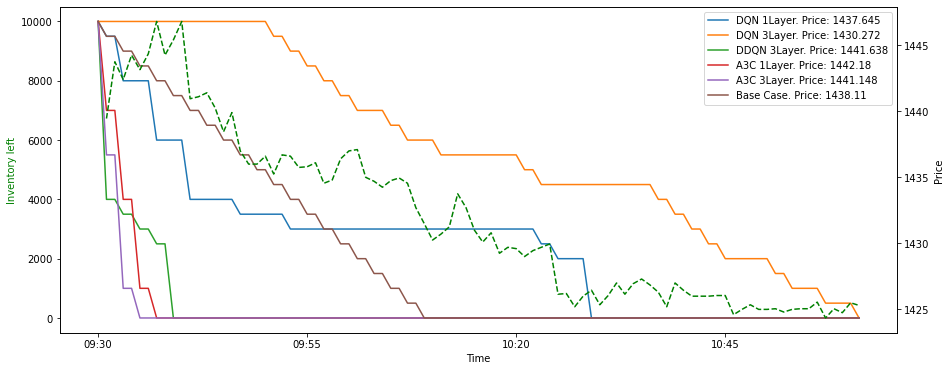

In [60]:
fig, ax = plt.subplots(1,1, figsize = (15,6))
ax2 = ax.twinx()


ax.plot(compare["Time"], compare["DQN1_Inv"], label = f"DQN 1Layer. Price: {execPrice_DQN1}")
ax.plot(compare["Time"], compare["DQN3_Inv"], label = f"DQN 3Layer. Price: {execPrice_DQN3}")
ax.plot(compare["Time"], compare["DDQN3_Inv"], label = f"DDQN 3Layer. Price: {execPrice_DDQN3}")
ax.plot(compare["Time"], compare["A3C1_Inv"], label = f"A3C 1Layer. Price: {execPrice_A3C1}")
ax.plot(compare["Time"], compare["A3C3_Inv"], label = f"A3C 3Layer. Price: {execPrice_A3C3}")
ax.plot(compare["Time"], compare["A3C3_Base"], label = f"Base Case. Price: {execPrice_Base}")

ax2.plot(compare["Time"], compare["ExecutedPrice"], color = "green", ls = "--")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

ax.set_xlabel('Time')
ax.set_ylabel('Inventory left', color='green')
ax2.set_ylabel('Price', color='black')

ax.legend()


Text(0.5, 0, 'Agents')

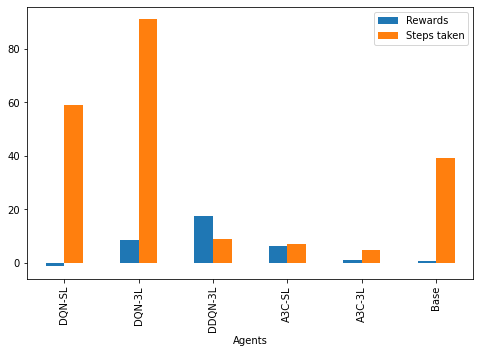

In [61]:


# creating dataframe
df = pd.DataFrame({
    "Algos":['DQN-SL', 'DQN-3L', 'DDQN-3L', 'A3C-SL', 'A3C-3L', 'Base'], 
    "Rewards": [rew_DQN1, rew_DQN3, rew_DDQN3, rew_A3C1, rew_A3C3, rew_Base], 
    "Steps taken": [step_DQN1, step_DQN3, step_DDQN3, step_A3C1, step_A3C3, step_Base]
})

fig, ax = plt.subplots(1,1,figsize = (8,5))
df.plot(x="Algos", y=["Rewards", "Steps taken"], kind="bar", ax = ax)
ax.set_xlabel("Agents")


In [62]:
np.sum(invHist_DDQN3["ExecutedInventory"]*invHist_DDQN3["ExecutedPrice"])/np.sum(invHist_DDQN3["ExecutedInventory"])

1441.6375

## ---- Run the same thing for a relatively less liquid stock  (SAIL)

In [63]:
usecase = "OrderExecution"


DQN3Model = os.path.join(os.path.join(os.path.join(os.path.join(MODEL_DIR, usecase), "DQN"), "FF"), "DQN_3Layer_80%Expl.h5")
DQN1Model = os.path.join(os.path.join(os.path.join(os.path.join(MODEL_DIR, usecase), "DQN"), "FF"), "DQN_1Layer_80%Exploration.h5")
DDQN3Model = os.path.join(os.path.join(os.path.join(os.path.join(MODEL_DIR, usecase), "DDQN"), "FF"), "DDQN_3Layer_80%Exploration.h5")
A3C1Model = os.path.join(os.path.join(os.path.join(os.path.join(MODEL_DIR, usecase), "A3C"), "FF"), "A3C_1Layer.h5")
A3C3Model = os.path.join(os.path.join(os.path.join(os.path.join(MODEL_DIR, usecase), "A3C"), "FF"), "A3C_3Layer.h5")

In [64]:
envName = "OrderExecution-v0"
envargs = {"ticker": "SAIL", "trainingYear": []}


execAlgo_DQN1 = ExecutionAlgos.Execution_DQN(envName=envName, **envargs)
invHist_DQN1, execPrice_DQN1, rew_DQN1, step_DQN1 = execAlgo_DQN1.run(modelWeights = DQN1Model, \
                hiddenUnits = [20], batchNormalization = False, dropoutRate = 0.25, \
                orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}, 
                testDate = "20200131")

execAlgo_DQN3 = ExecutionAlgos.Execution_DQN(envName=envName, **envargs)
invHist_DQN3, execPrice_DQN3, rew_DQN3, step_DQN3 = execAlgo_DQN3.run(modelWeights = DQN3Model, \
                hiddenUnits = [20, 20, 20], batchNormalization = False, dropoutRate = 0.25, \
                orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}, 
                testDate = "20200131")




execAlgo_DDQN3 = ExecutionAlgos.Execution_DDQN(envName=envName, **envargs)
invHist_DDQN3, execPrice_DDQN3, rew_DDQN3, step_DDQN3 = execAlgo_DDQN3.run(modelWeights = DDQN3Model, \
                hiddenUnits = [20,20,20], batchNormalization = False, dropoutRate = 0.25, \
                orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}, 
                testDate = "20200131")



execAlgo_A3C1 = ExecutionAlgos.Execution_A3C(envName=envName, **envargs)
invHist_A3C1, execPrice_A3C1, rew_A3C1, step_A3C1 = execAlgo_A3C1.run(modelWeights = A3C1Model, \
                actorHiddenUnits = [20], criticHiddenUnits = [20], \
                orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}, 
                testDate = "20200131")


execAlgo_A3C3 = ExecutionAlgos.Execution_A3C(envName=envName, **envargs)
invHist_A3C3, execPrice_A3C3, rew_A3C3, step_A3C3 = execAlgo_A3C3.run(modelWeights = A3C3Model, \
                actorHiddenUnits = [20,20,20], criticHiddenUnits = [20,20,20], \
                orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}, 
                testDate = "20200131")


execAlgo_Base = ExecutionAlgos.Execution_EquiBalanced(envName=envName, **envargs)
invHist_Base, execPrice_Base, rew_Base, step_Base = execAlgo_Base.run(inidividualOrderSize = 1, \
                orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}, 
                testDate = "20200131")

Loading Data for 2020
20200131

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Total episodic reward using DQN: 7.0499999999999865. Steps taken: 100
Loading Data for 2020
20200131

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you 

In [65]:
compare = None
if compare is None:

    compare = invHist_DQN1[["Time", "ExecutedPrice"]]

compare = compare.merge(invHist_DQN1[["Time", "AvailableInventory", "ExecutedPrice"]], how = "outer", left_on = ["Time", "ExecutedPrice"], right_on = ["Time", "ExecutedPrice"] )
compare.rename(columns = {"AvailableInventory": "DQN1_Inv"}, inplace = True)

compare = compare.merge(invHist_DQN3[["Time", "AvailableInventory", "ExecutedPrice"]], how = "outer", left_on = ["Time", "ExecutedPrice"], right_on = ["Time", "ExecutedPrice"] )
compare.rename(columns = {"AvailableInventory": "DQN3_Inv"}, inplace = True)

compare = compare.merge(invHist_DDQN3[["Time", "AvailableInventory", "ExecutedPrice"]], how = "outer", left_on = ["Time", "ExecutedPrice"], right_on = ["Time", "ExecutedPrice"] )
compare.rename(columns = {"AvailableInventory": "DDQN3_Inv"}, inplace = True)

compare = compare.merge(invHist_A3C1[["Time", "AvailableInventory", "ExecutedPrice"]], how = "outer", left_on = ["Time", "ExecutedPrice"], right_on = ["Time", "ExecutedPrice"] )
compare.rename(columns = {"AvailableInventory": "A3C1_Inv"}, inplace = True)

compare = compare.merge(invHist_A3C3[["Time", "AvailableInventory", "ExecutedPrice"]], how = "outer", left_on = ["Time", "ExecutedPrice"], right_on = ["Time", "ExecutedPrice"] )
compare.rename(columns = {"AvailableInventory": "A3C3_Inv"}, inplace = True)

compare = compare.merge(invHist_Base[["Time", "AvailableInventory", "ExecutedPrice"]], how = "outer", left_on = ["Time", "ExecutedPrice"], right_on = ["Time", "ExecutedPrice"] )
compare.rename(columns = {"AvailableInventory": "A3C3_Base"}, inplace = True)

compare = compare.ffill(axis=0)

Text(0.5, 0.98, 'SAIL')

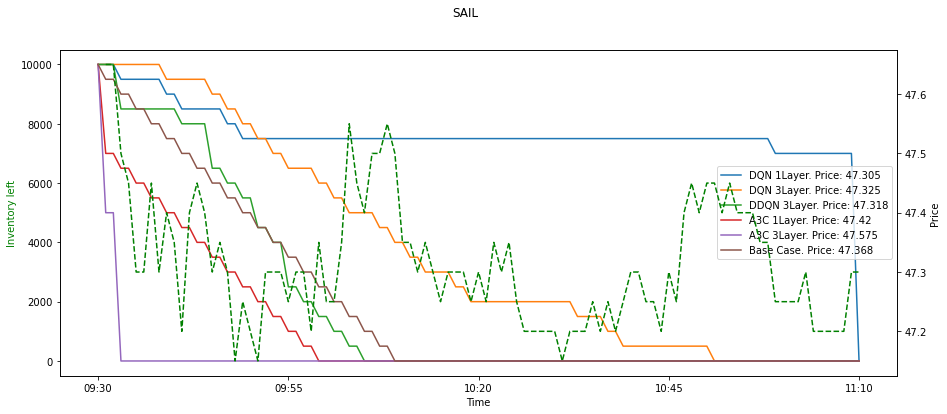

In [66]:
fig, ax = plt.subplots(1,1, figsize = (15,6))
ax2 = ax.twinx()


ax.plot(compare["Time"], compare["DQN1_Inv"], label = f"DQN 1Layer. Price: {execPrice_DQN1}")
ax.plot(compare["Time"], compare["DQN3_Inv"], label = f"DQN 3Layer. Price: {execPrice_DQN3}")
ax.plot(compare["Time"], compare["DDQN3_Inv"], label = f"DDQN 3Layer. Price: {execPrice_DDQN3}")
ax.plot(compare["Time"], compare["A3C1_Inv"], label = f"A3C 1Layer. Price: {execPrice_A3C1}")
ax.plot(compare["Time"], compare["A3C3_Inv"], label = f"A3C 3Layer. Price: {execPrice_A3C3}")
ax.plot(compare["Time"], compare["A3C3_Base"], label = f"Base Case. Price: {execPrice_Base}")

ax2.plot(compare["Time"], compare["ExecutedPrice"], color = "green", ls = "--")
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

ax.set_xlabel('Time')
ax.set_ylabel('Inventory left', color='green')
ax2.set_ylabel('Price', color='black')

ax.legend()
plt.suptitle("SAIL")

Text(0.5, 0, 'Agents')

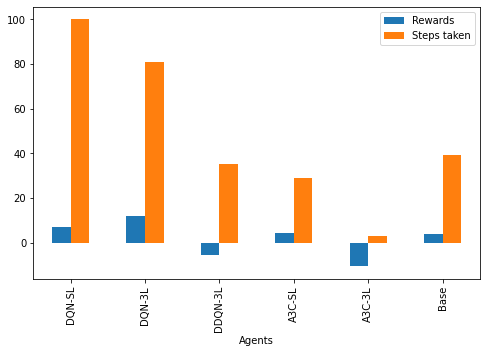

In [67]:


# creating dataframe
df = pd.DataFrame({
    "Algos":['DQN-SL', 'DQN-3L', 'DDQN-3L', 'A3C-SL', 'A3C-3L', 'Base'], 
    "Rewards": [rew_DQN1, rew_DQN3, rew_DDQN3, rew_A3C1, rew_A3C3, rew_Base], 
    "Steps taken": [step_DQN1, step_DQN3, step_DDQN3, step_A3C1, step_A3C3, step_Base]
})

fig, ax = plt.subplots(1,1,figsize = (8,5))
df.plot(x="Algos", y=["Rewards", "Steps taken"], kind="bar", ax = ax)
ax.set_xlabel("Agents")


### Dig deeper for DQN-SL

#### Get value functions associated with every possible state 

In [68]:
from RLLibrary.FinUseCases import CustomGym
from RLLibrary.FinUseCases.OrderExecution.ModelManager.DQN import NetworkManager as DQNNet

In [121]:
envName = "OrderExecution-v0"
envargs = {"ticker": "RELIANCE", "trainingYear": []}

orderConfig = {"initialOrderSize": 10000, "initialTimeHorizon": 100, "orderFactor": 500, \
                                "TotalIntervals": 50, "startTime": "09:30", "Timezone": "IST"}
testDate = "20200131"

envargs["orderConfig"] = orderConfig
envargs["testDate"] = testDate
envargs["trainingYear"] = []

modelWeights = DQN1Model

env = CustomGym.make(envName, **envargs)

Loading Data for 2020
20200131


In [122]:
model = DQNNet.NN_FF(state_size=env.observation_space.n, action_size=len(env.action_space.actions), \
                    hiddenUnits=[20], batchNormalization=False, dropout_rate=.25)

# compile the model
model(tf.convert_to_tensor(np.array(env.observation_space.currentState)[None, :], dtype = tf.float32))

# load the weights
model.load_weights(modelWeights)


In [128]:
inventory = np.arange(0,10500,500)
timeleft = np.arange(0,101,2)

_xx, _yy = np.meshgrid(inventory, timeleft)
x, y = _xx.ravel(), _yy.ravel()



In [129]:
_xx[0]

array([    0,   500,  1000,  1500,  2000,  2500,  3000,  3500,  4000,
        4500,  5000,  5500,  6000,  6500,  7000,  7500,  8000,  8500,
        9000,  9500, 10000])

In [139]:
actionTaken=np.zeros(_xx.shape)
actionTaken.shape


count=np.zeros(_xx.shape)
count.shape


(51, 21)

In [140]:
count[0][0]

0.0

In [144]:
# select 100 random dates 
for i in range(2):
    # run the environment
    testDate = np.random.choice(env.DataManager.dates["2020"])
    print(f'For {testDate}')
    env.reset(resetDate = testDate)
    done = False
    currentState = env.observation_space.currentState
    episodic_reward = 0
    episodic_steps = 0
    while not done:

        currentState = np.array(currentState).reshape(1, env.observation_space.n)

        

        laststep = False
        if episodic_steps % env.TimeGapbetweenIntervals == 0:
            # take model defined action 

            inventoryLeft = env.currentInfo.AvailableInventory
            _thistimeLeft = env.currentInfo.TimeLeft
            # get the index for inventory left
            _indexInventory = list(inventory).index(inventoryLeft)
            _indexTime = list(timeleft).index(_thistimeLeft)

            actionValues = model(currentState)
            actionIndex = np.argmax(actionValues[0])        # greeedy action
            action = env.action_space.actions[actionIndex]

            this_action = [inventoryLeft, timeLeft, action, episodic_steps]

        else :
            actionIndex = 0                     # no order to be executed
            action = 0
            this_action = None


        if env.currentInfo.TimeLeft == 1:
            # if only 1 minute left, execute all remaining orders

            action = env.currentInfo.AvailableInventory/ env.orderSizeFactor
            actionIndex = action            # in this case, action and actionIndex are same
            this_action = [inventoryLeft, timeLeft, action, episodic_steps]



        next_state, reward, done, _ = env.step(action)


        episodic_reward += reward
        episodic_steps += 1
        currentState = next_state

        if this_action is not None:
            count[_indexTime][_indexInventory] += 1
            actionTaken[_indexTime][_indexInventory] += action
            ##print(count[_indexTime][_indexInventory], action)
#             actionTaken[_indexTime][_indexInventory] /= count[_indexTime][_indexInventory]
#             optimalaction.append(this_action)



print(f'Total episodic reward using DQN: {episodic_reward}. Steps taken: {episodic_steps}')
invHistory = env.getInventoryHistory()

effectiveExecutedPrice = np.sum(invHistory["ExecutedInventory"]*invHistory["ExecutedPrice"])/np.sum(invHistory["ExecutedInventory"])


For 20200127
For 20200921
Total episodic reward using DQN: 5.35. Steps taken: 100


In [142]:
actionTaken.shape

(51, 21)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [92]:
optimal = pd.DataFrame(optimalaction, columns = ["AvailableInventory", "TimeLeft", "Action", "StepsSoFar"])

In [94]:
optimal.head()

,AvailableInventory,TimeLeft,Action,StepsSoFar
0,10000,100,1,0
1,9500,98,3,2
2,8000,96,0,4
3,8000,94,4,6
4,6000,92,0,8


In [ ]:

# setup the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(1, projection='3d')

# fake data
_x = optimal["AvailableInventory"]
_y = optimal["TimeLeft"]
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()

top = x + y
bottom = np.zeros_like(top)
width = depth = 1

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')


plt.show()

In [95]:
# fake data
_x = optimal["AvailableInventory"]
_y = optimal["TimeLeft"]
_xx, _yy = np.meshgrid(_x, _y)
x, y = _xx.ravel(), _yy.ravel()


In [99]:
_x.shape

(30,)

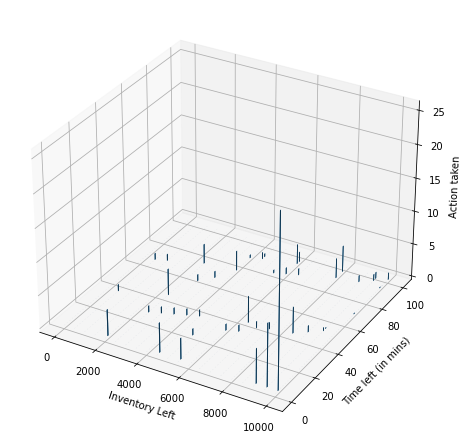

In [165]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator

# thickness of the bars
dx, dy = .8, .8

# prepare 3d axes
fig = plt.figure(figsize=(10,6))
ax = Axes3D(fig)

# set up positions for the bars 
# xpos=np.arange(eg.shape[0])
# ypos=np.arange(eg.shape[1])

xpos = np.arange(0,10500,500)
ypos = np.arange(0,101,2)

# _xx, _yy = np.meshgrid(inventory, timeleft)
# x, y = _xx.ravel(), _yy.ravel()


# set the ticks in the middle of the bars
ax.set_xticks(xpos + dx/2)
ax.set_yticks(ypos + dy/2)

# create meshgrid 
# print xpos before and after this block if not clear
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()

# the bars starts from 0 attitude
zpos=np.zeros(xpos.shape).flatten()

# the bars' heights
# dz = eg.values.ravel()
dz = actionTaken.ravel()

# plot 
ax.bar3d(xpos,ypos,zpos,dx,dy,dz)

# put the column / index labels
# ax.w_yaxis.set_ticklabels("TimeLeft")
# ax.w_xaxis.set_ticklabels("InventoryLeft")
# inventory = np.arange(0,10500,500)
# timeleft = np.arange(0,101,2)

# ax.set_xlabel('xxxxxxxxx', labelpad=50)
# ax.set_ylabel('xxxxxxxxx', labelpad=50)
# ax.set_zlabel('xxxxxxxxx')

ax.set_xlabel("Inventory Left")
ax.set_ylabel("Time left (in mins)")
ax.set_zlabel("Action taken")

ax.xaxis.set_ticks(np.arange(0, 10500,2000))
ax.yaxis.set_ticks(np.arange(0, 105,20))
# ax.w_xaxis.set_major_locator(MaxNLocator(len(inventory)+1))
# ax.w_yaxis.set_major_locator(MaxNLocator(len(timeleft)+1))


In [159]:
MaxNLocator(len(inventory))